0.97
Early stopping at epoch 69


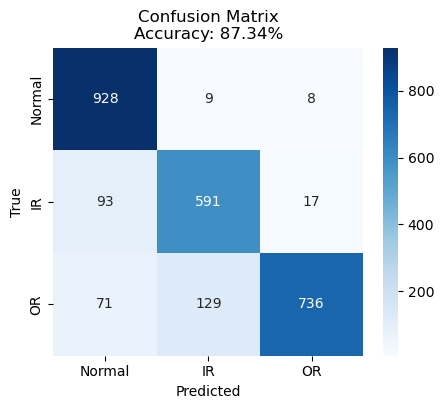

 - Model accuracy: 87.34%


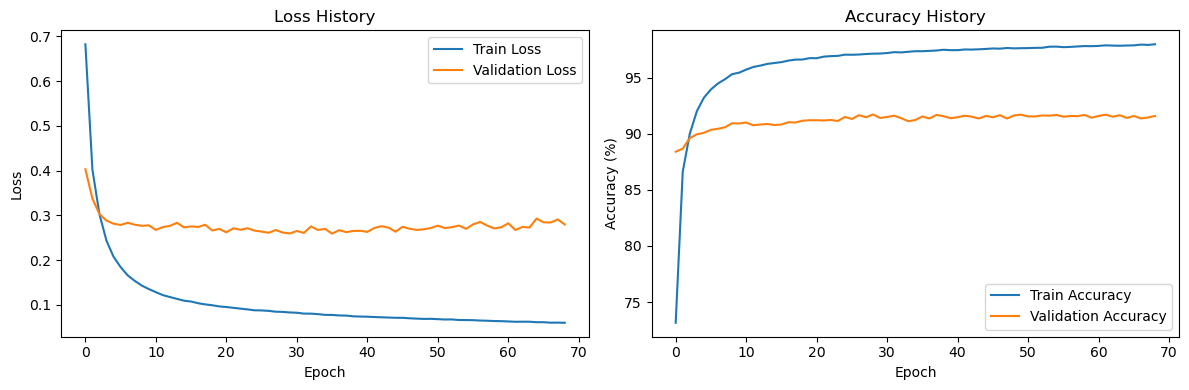

0.97
Early stopping at epoch 115


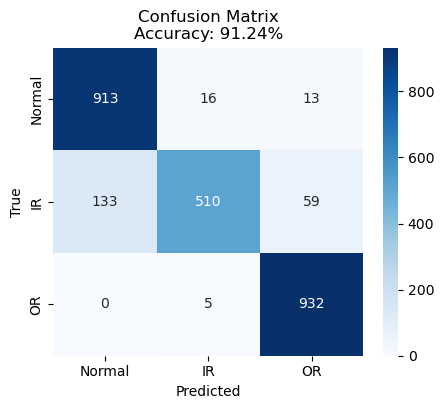

 - Model accuracy: 91.24%


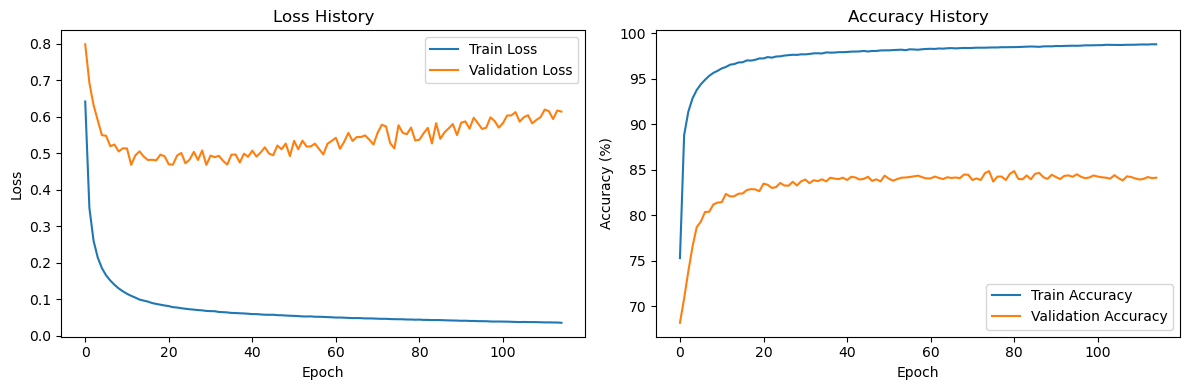

0.97
Early stopping at epoch 133


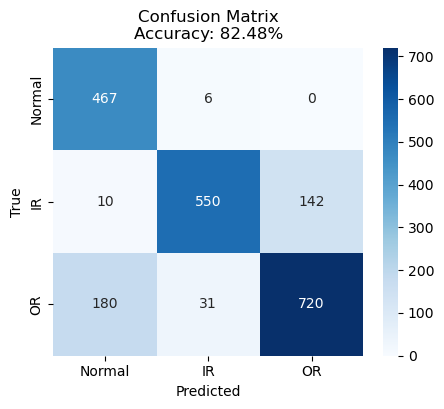

 - Model accuracy: 82.48%


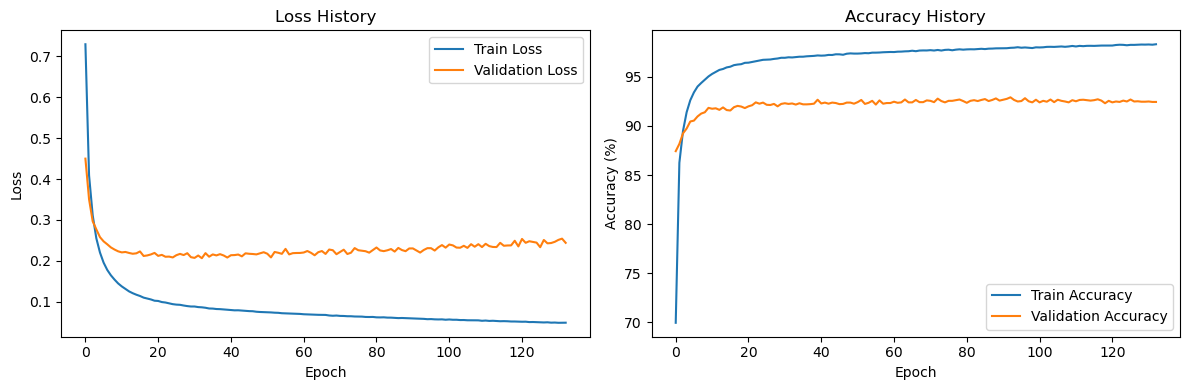

0.97
Early stopping at epoch 269


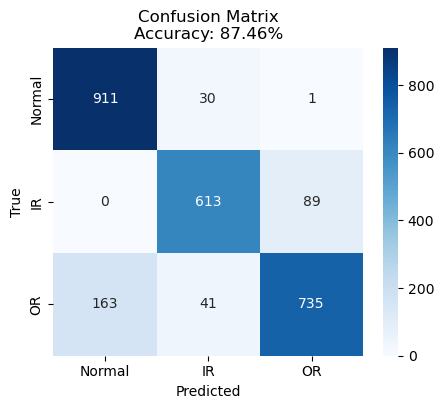

 - Model accuracy: 87.46%


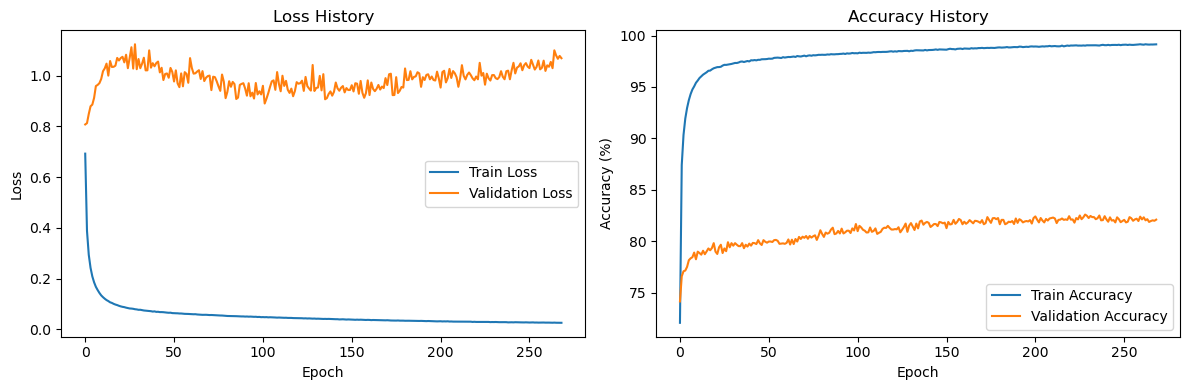

0.97
Early stopping at epoch 87


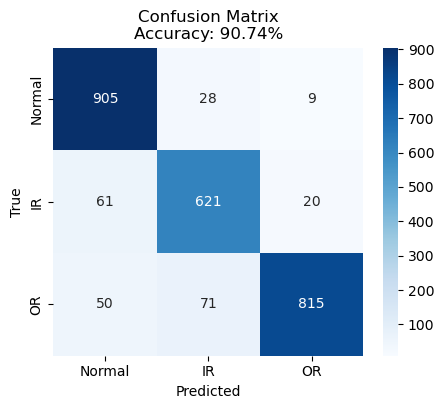

 - Model accuracy: 90.74%


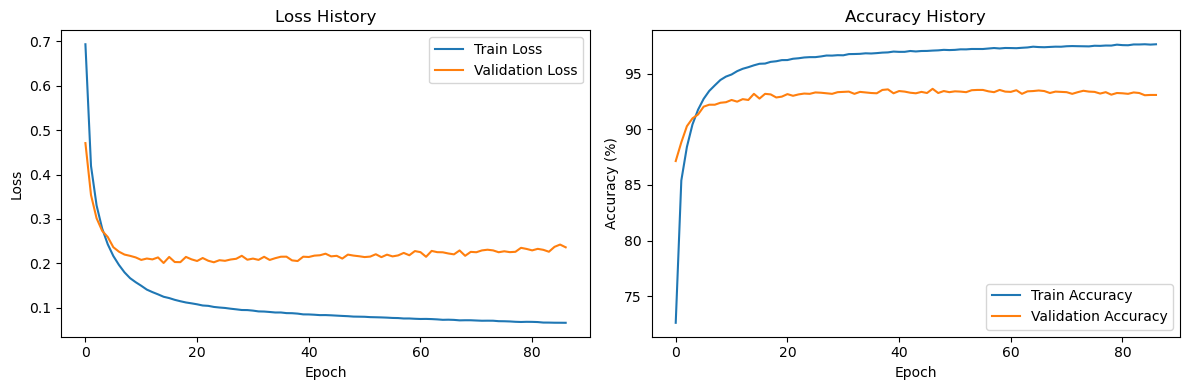

0.97
Early stopping at epoch 81


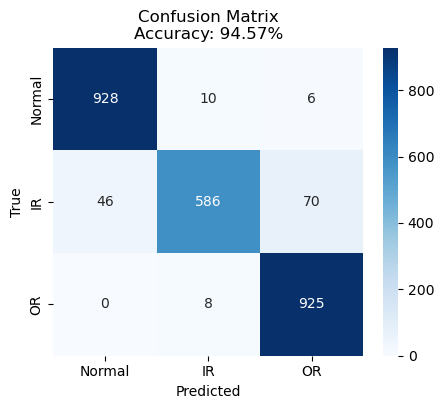

 - Model accuracy: 94.57%


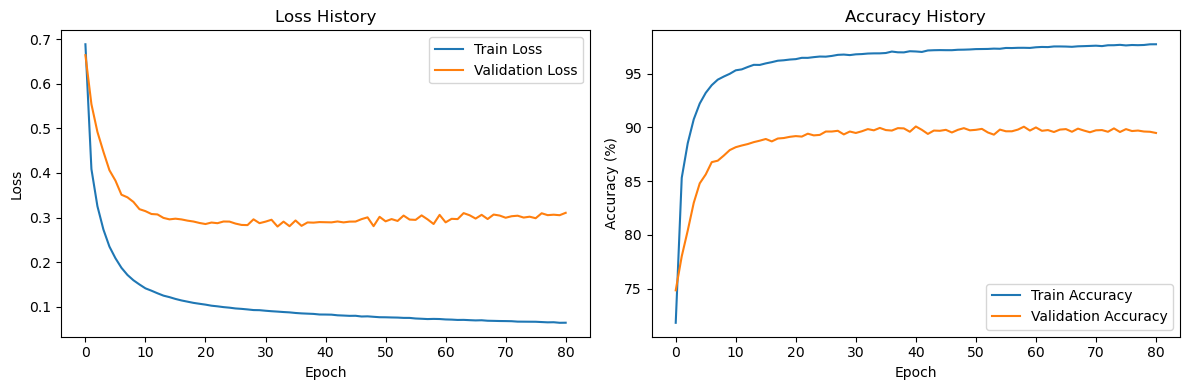

0.97
Early stopping at epoch 196


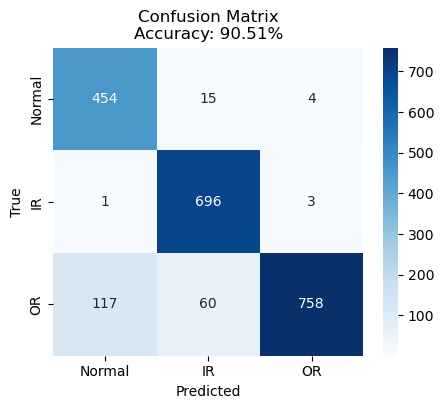

 - Model accuracy: 90.51%


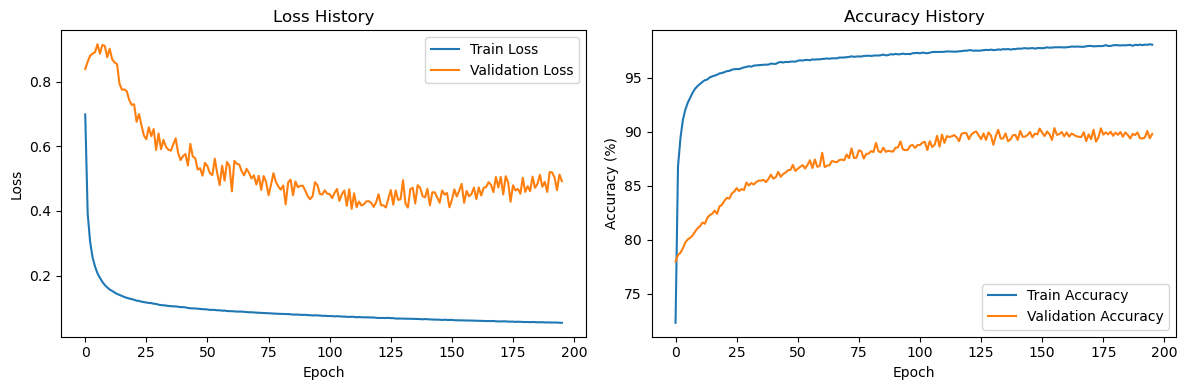

0.97
Early stopping at epoch 142


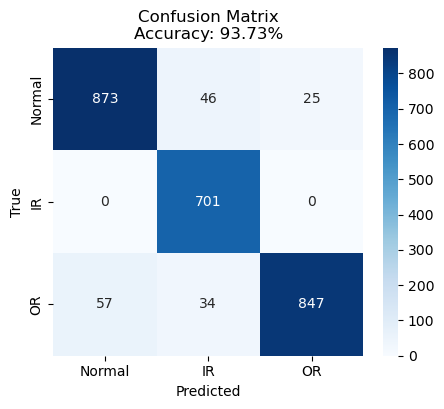

 - Model accuracy: 93.73%


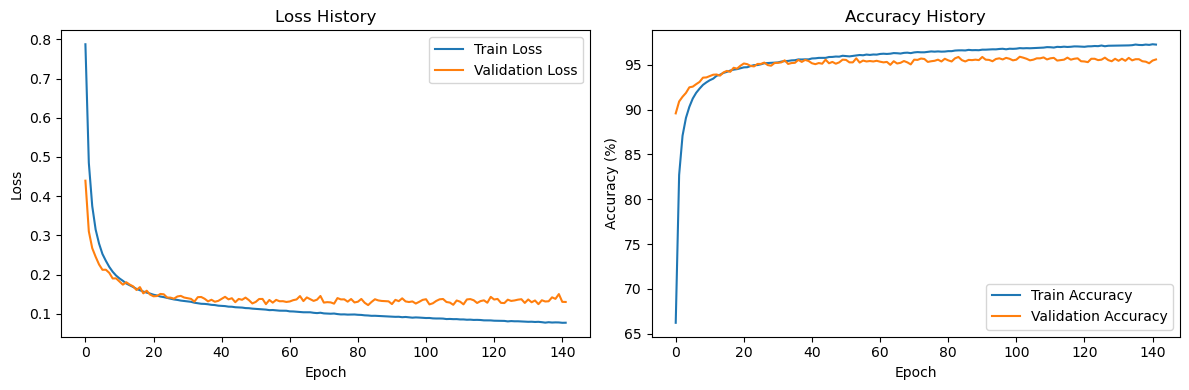

0.97
Early stopping at epoch 93


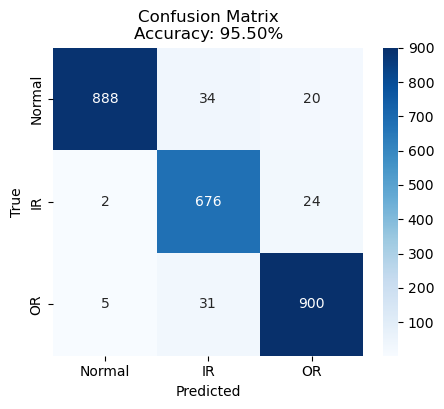

 - Model accuracy: 95.50%


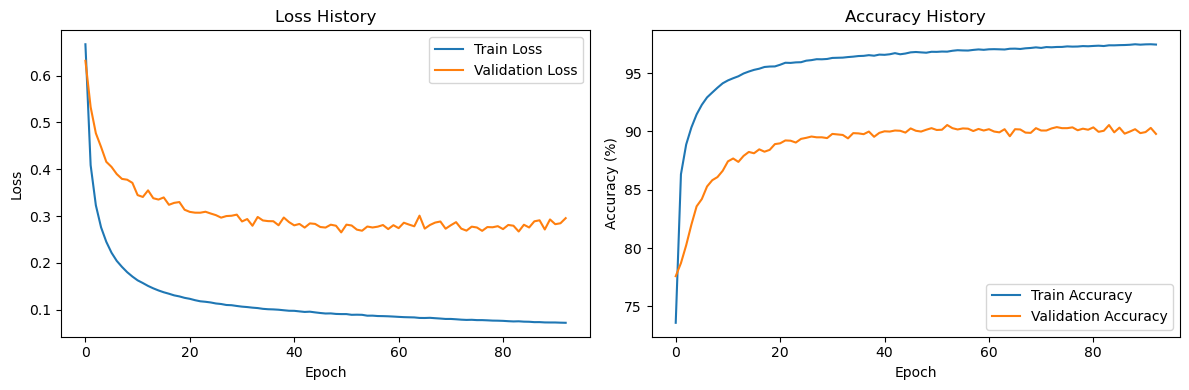

0.97
Early stopping at epoch 97


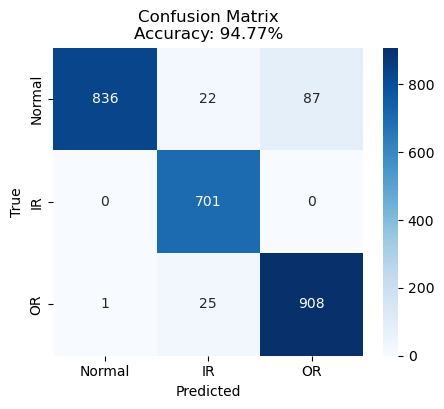

 - Model accuracy: 94.77%


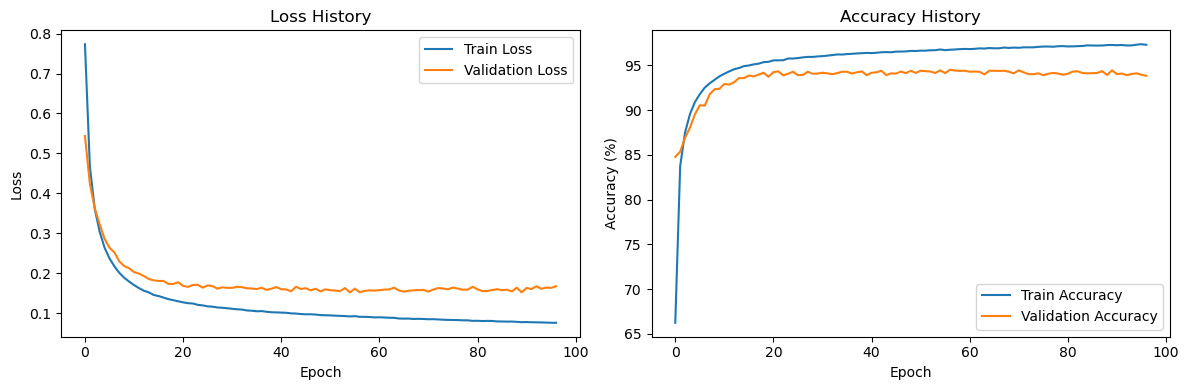

0.97
Early stopping at epoch 72


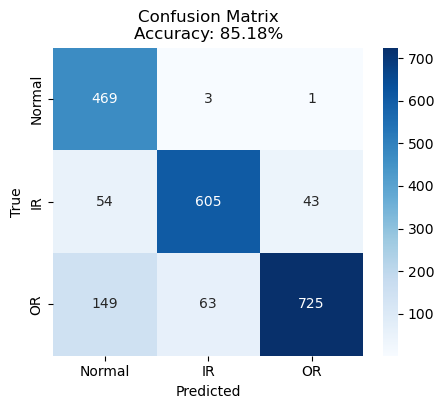

 - Model accuracy: 85.18%


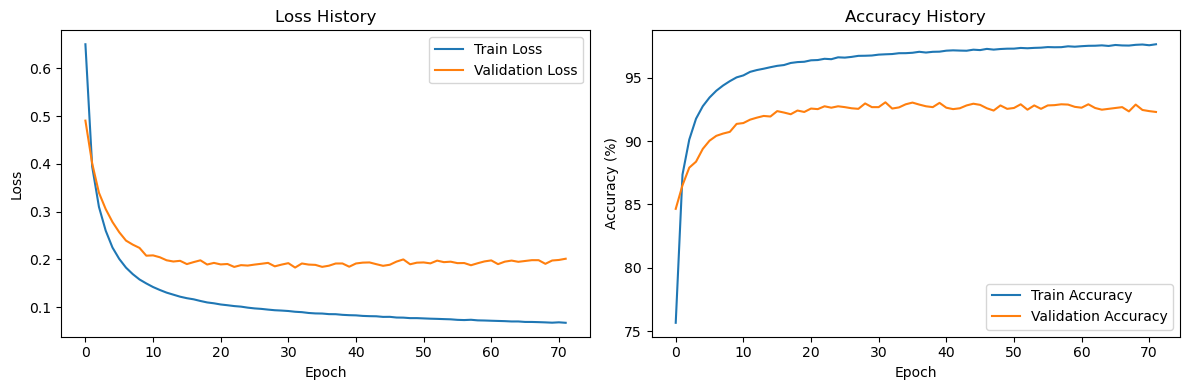

0.97
Early stopping at epoch 68


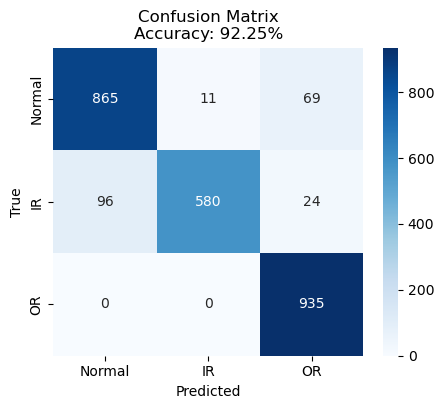

 - Model accuracy: 92.25%


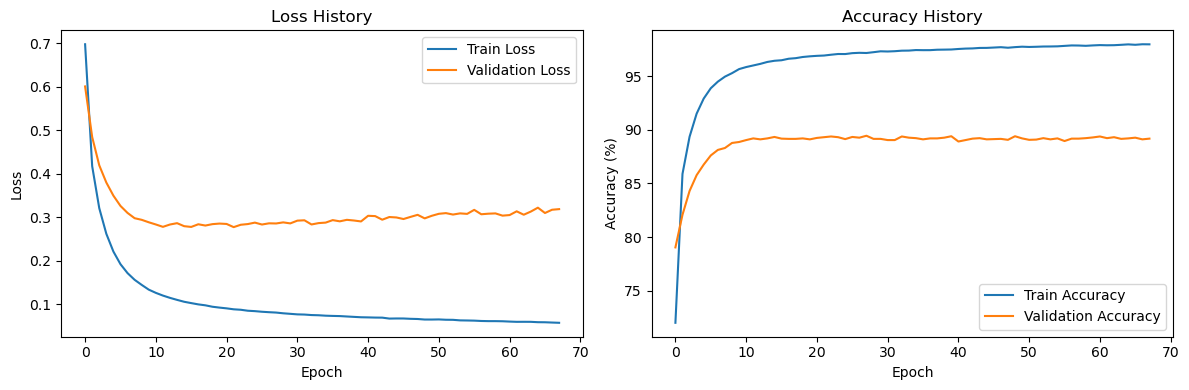

0.97
Early stopping at epoch 87


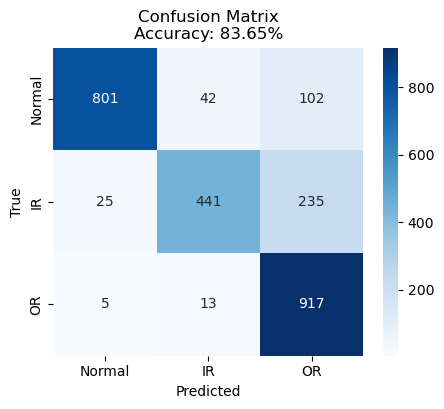

 - Model accuracy: 83.65%


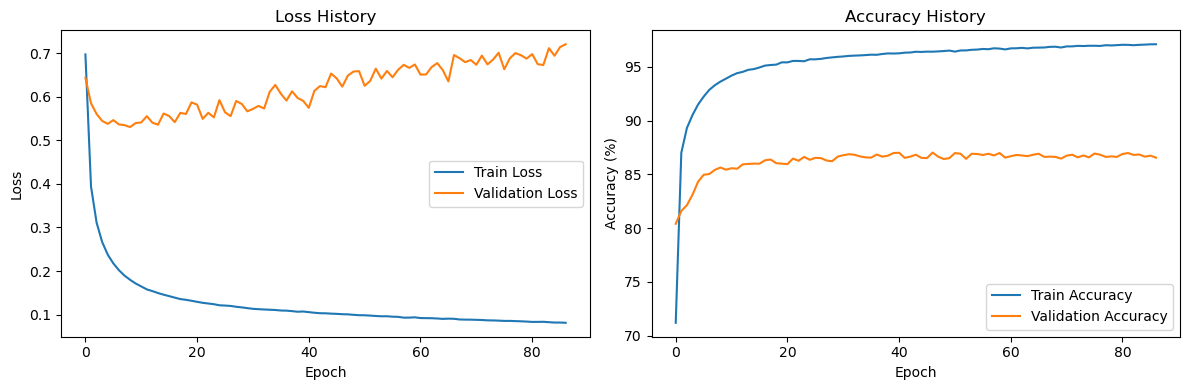

0.97
Early stopping at epoch 97


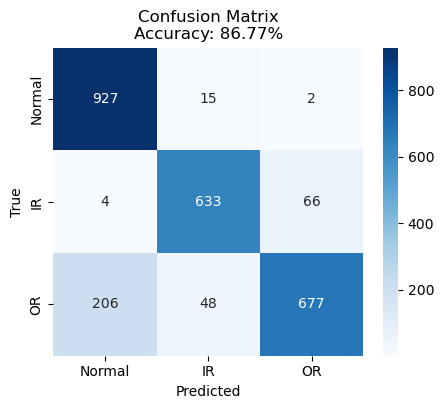

 - Model accuracy: 86.77%


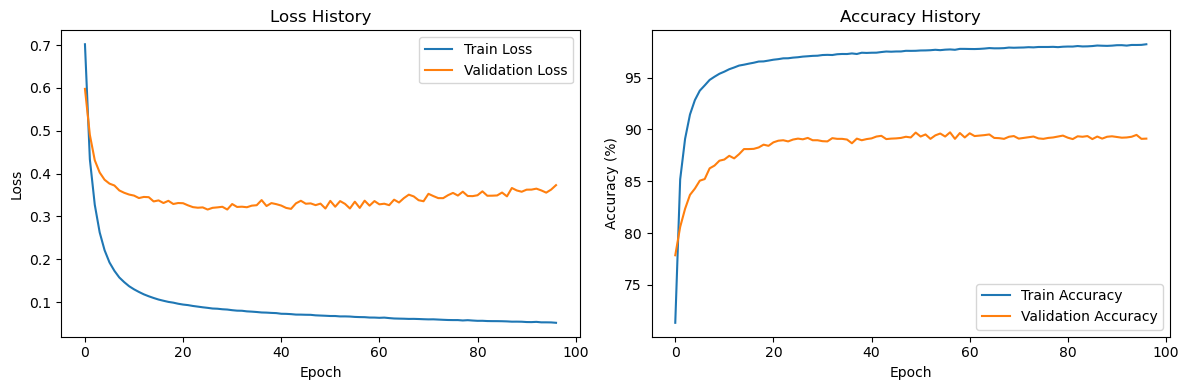

0.97
Early stopping at epoch 153


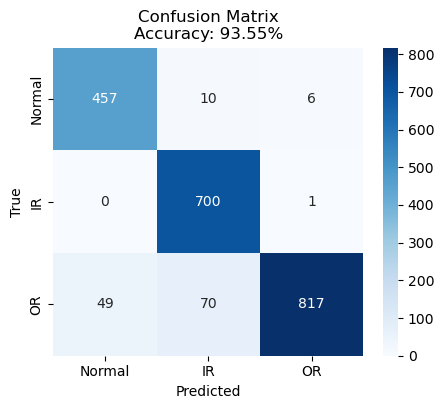

 - Model accuracy: 93.55%


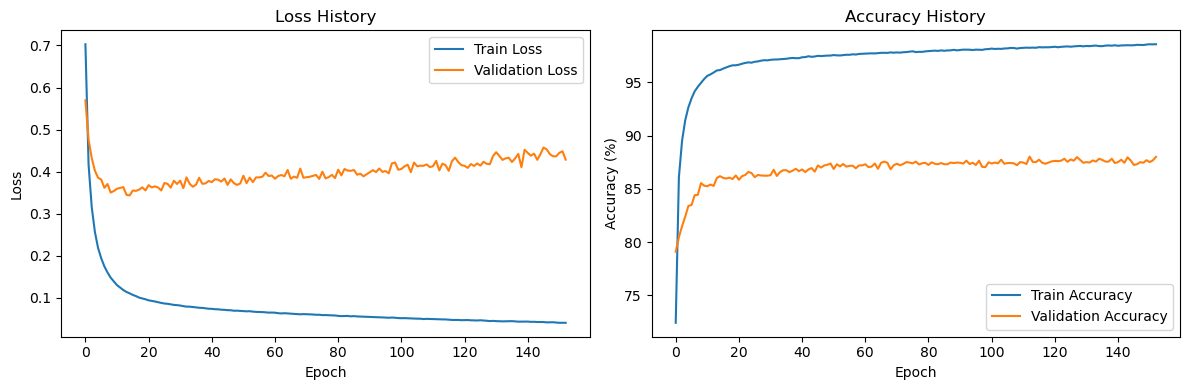

0.97
Early stopping at epoch 91


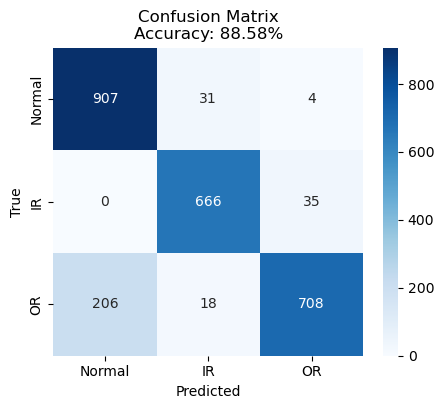

 - Model accuracy: 88.58%


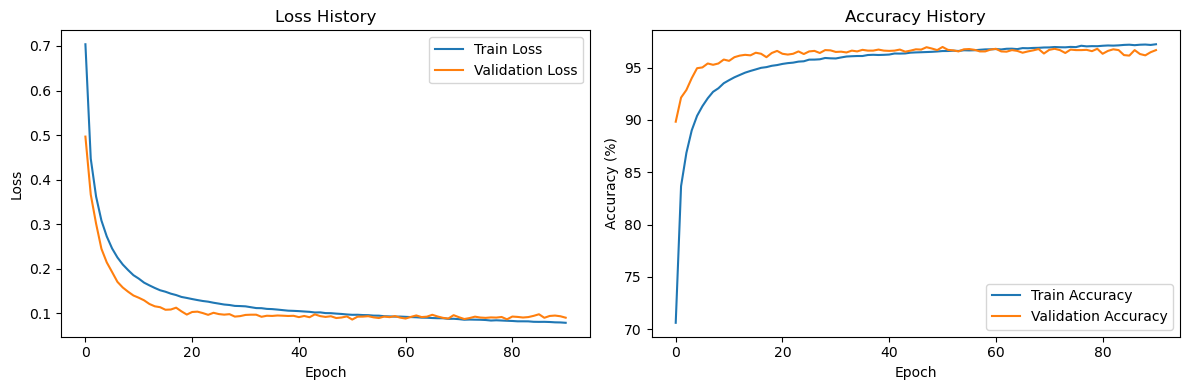

0.97
Early stopping at epoch 129


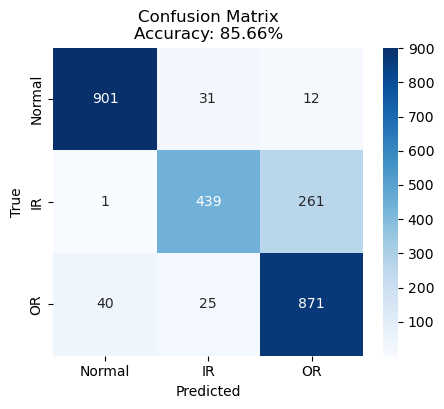

 - Model accuracy: 85.66%


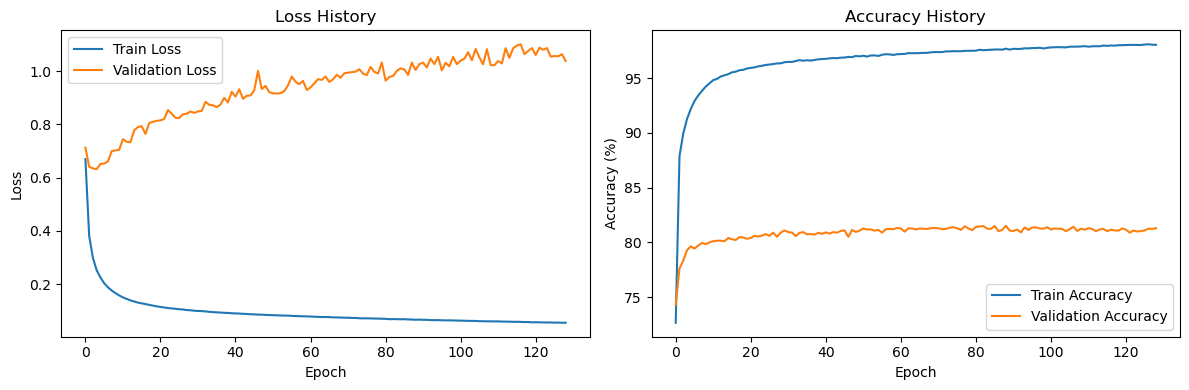

0.97
Early stopping at epoch 173


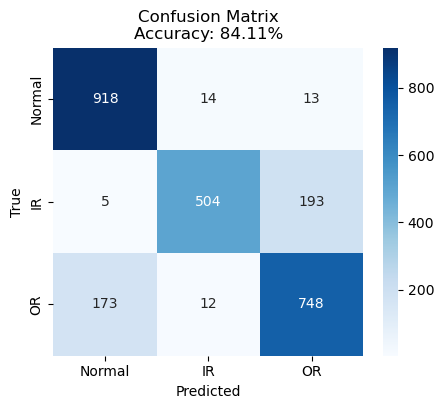

 - Model accuracy: 84.11%


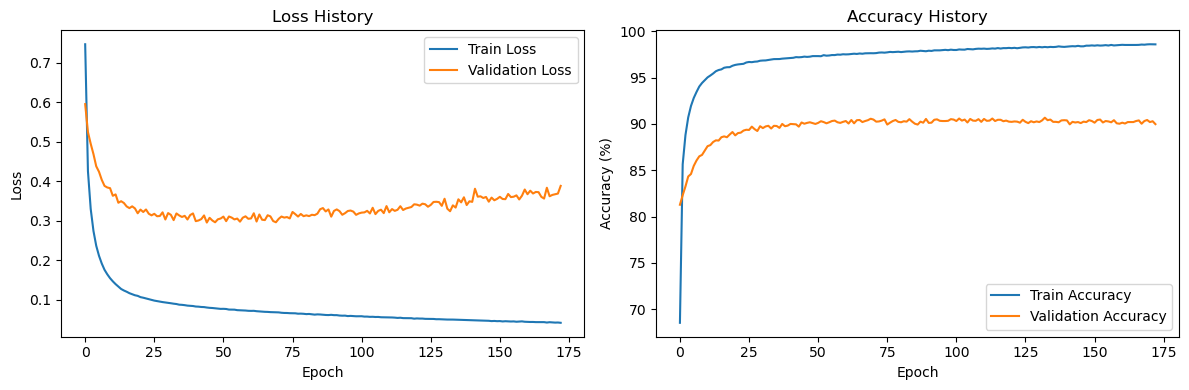

0.97
Early stopping at epoch 118


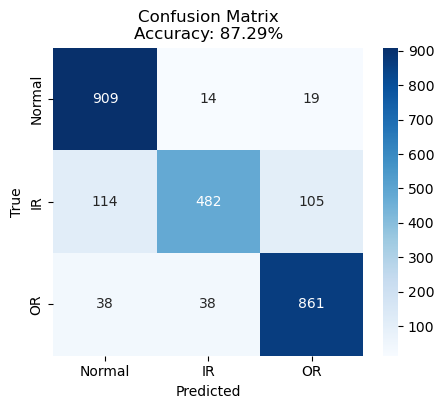

 - Model accuracy: 87.29%


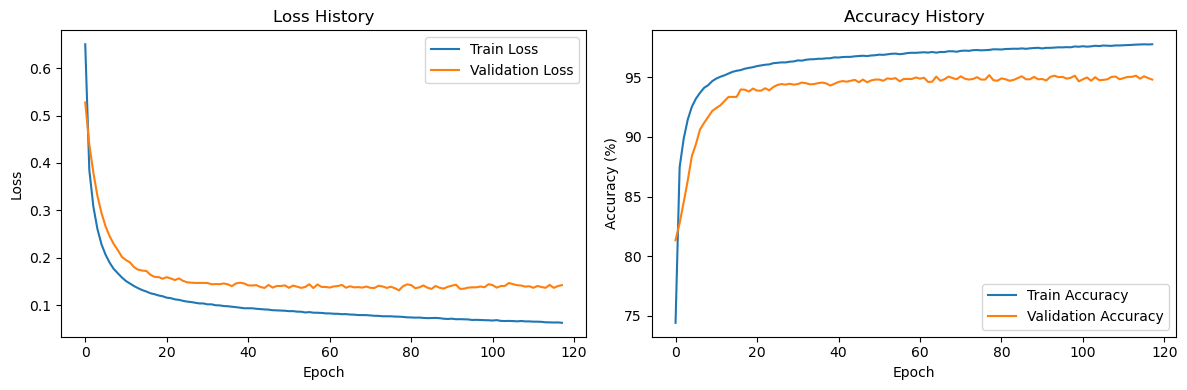

0.97
Early stopping at epoch 189


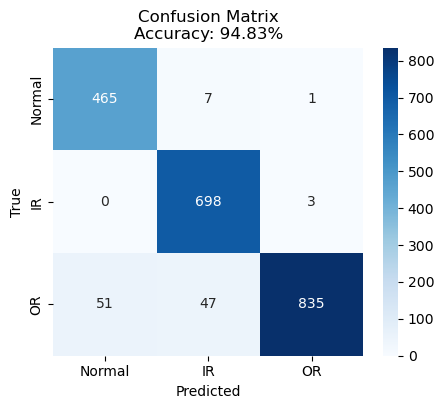

 - Model accuracy: 94.83%


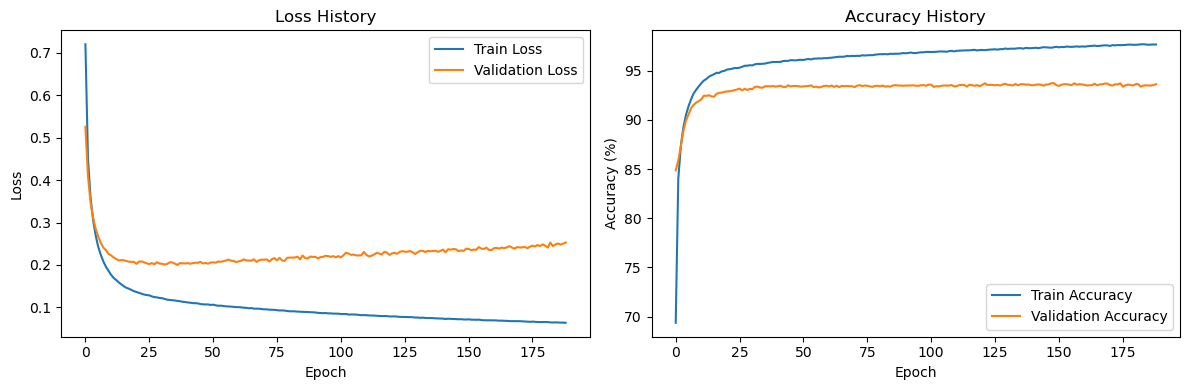

0.97
Early stopping at epoch 88


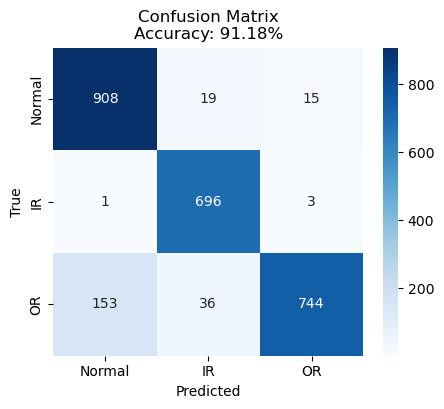

 - Model accuracy: 91.18%


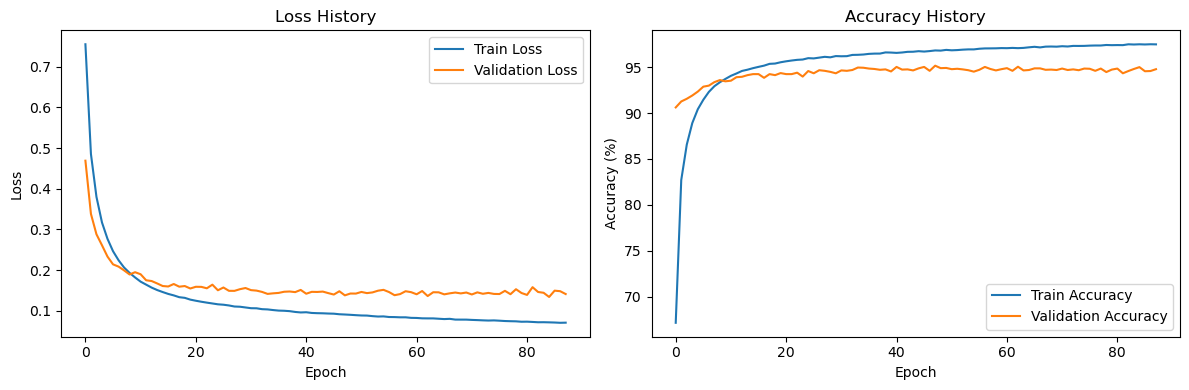

0.97
Early stopping at epoch 73


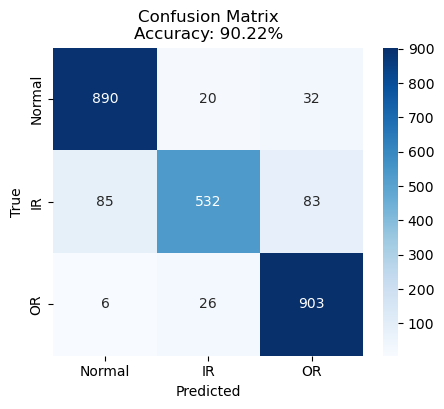

 - Model accuracy: 90.22%


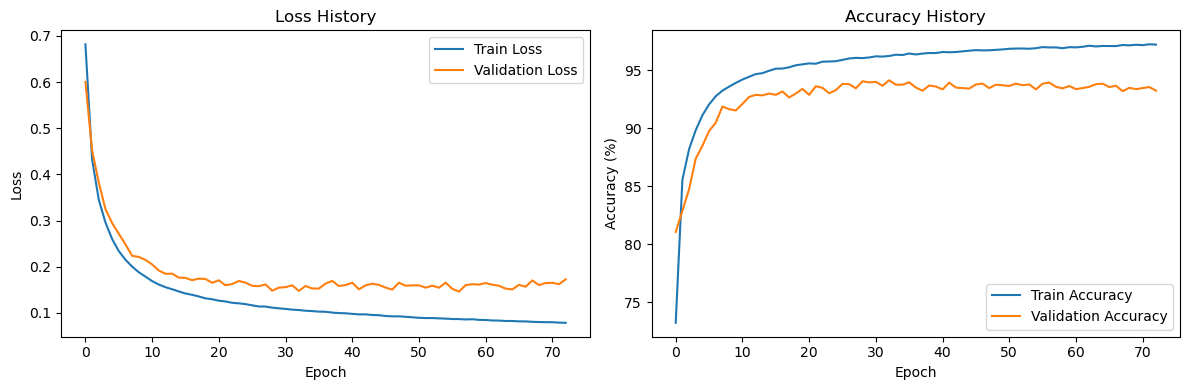

0.97
Early stopping at epoch 88


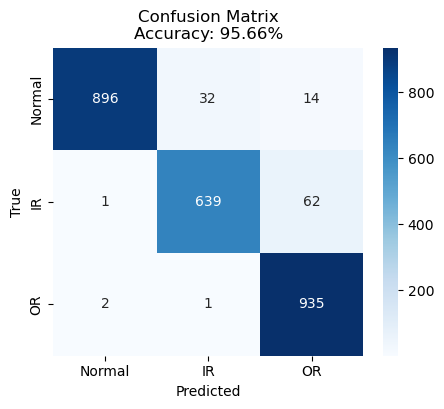

 - Model accuracy: 95.66%


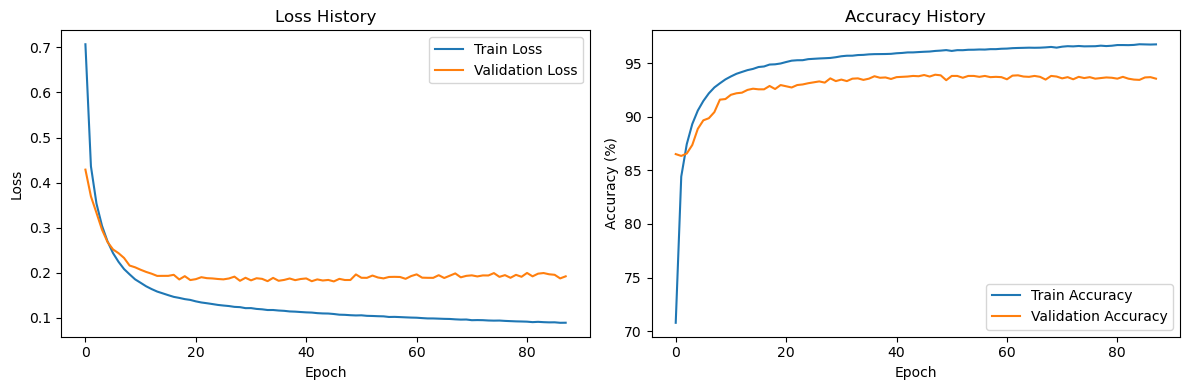

0.97
Early stopping at epoch 264


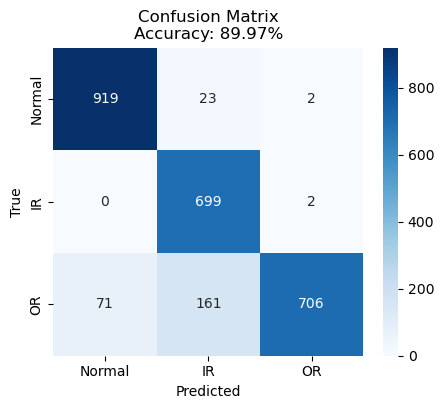

 - Model accuracy: 89.97%


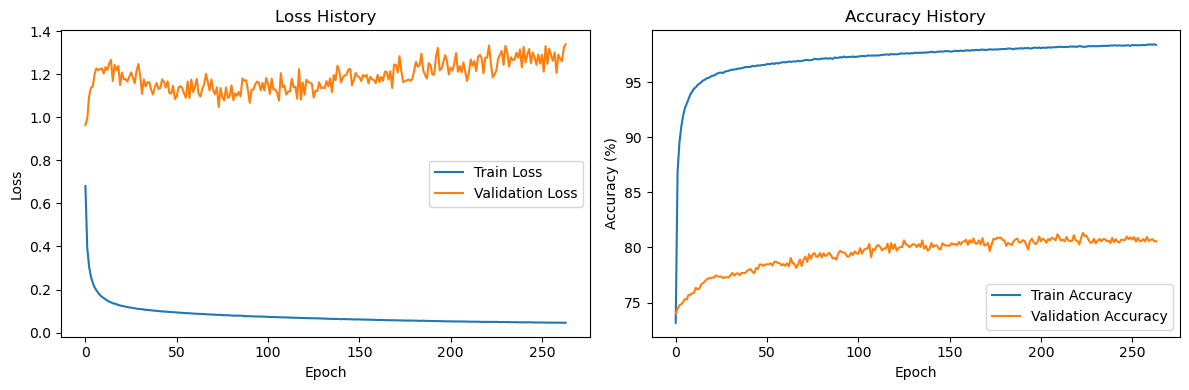

0.97
Early stopping at epoch 103


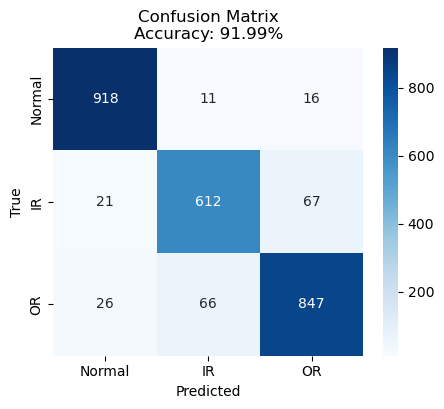

 - Model accuracy: 91.99%


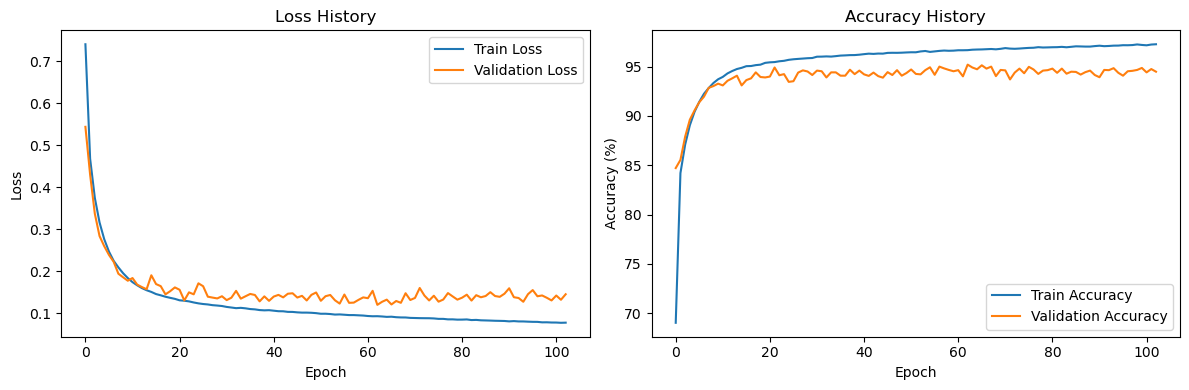

0.97
Early stopping at epoch 65


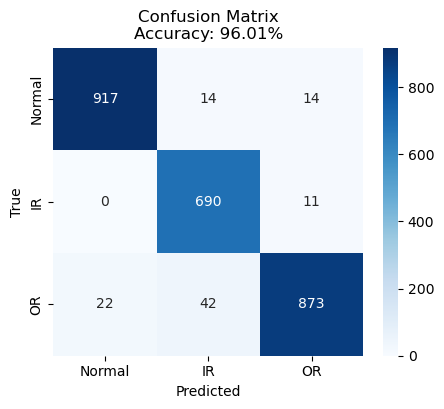

 - Model accuracy: 96.01%


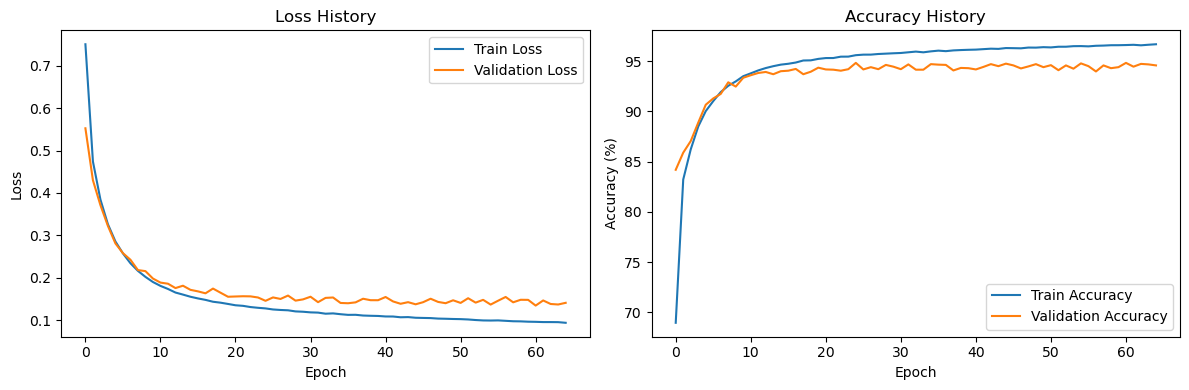

0.97
Early stopping at epoch 122


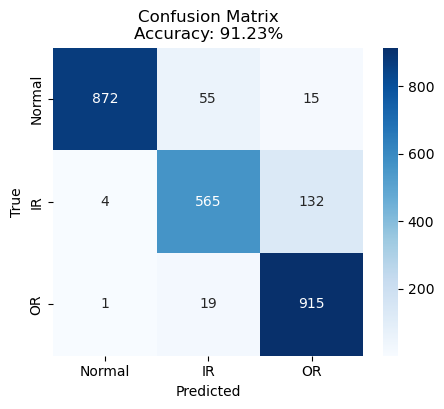

 - Model accuracy: 91.23%


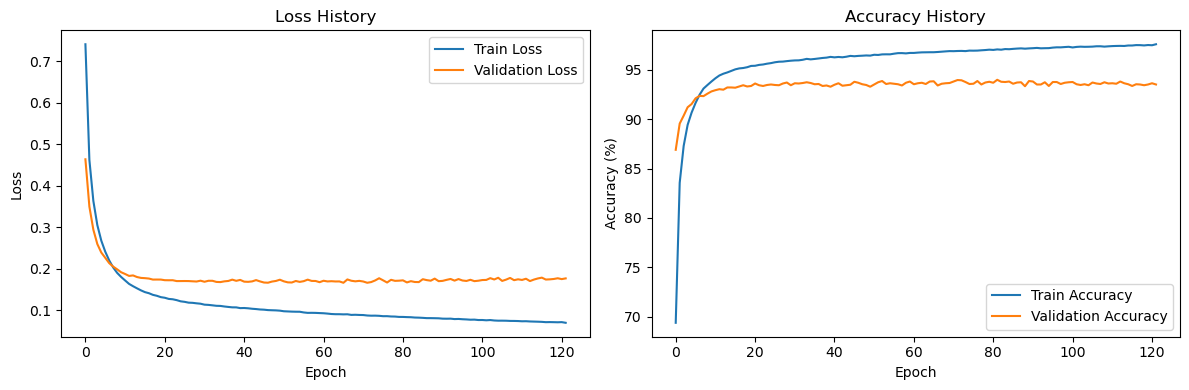

0.97
Early stopping at epoch 167


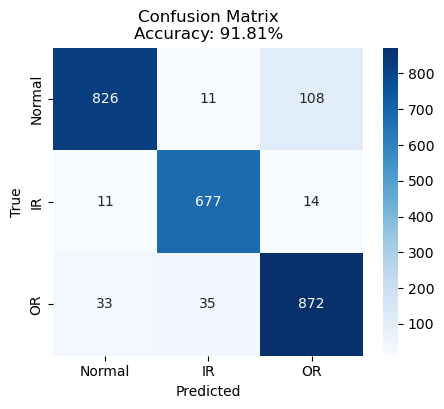

 - Model accuracy: 91.81%


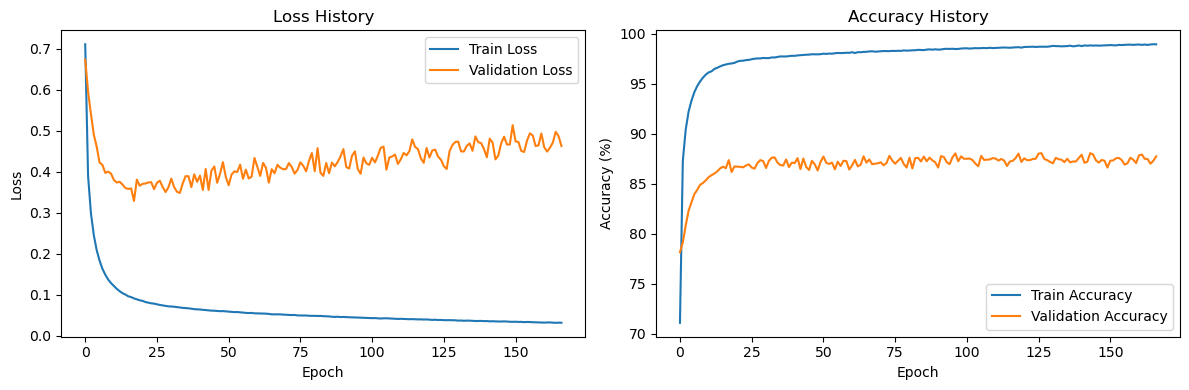

0.97
Early stopping at epoch 87


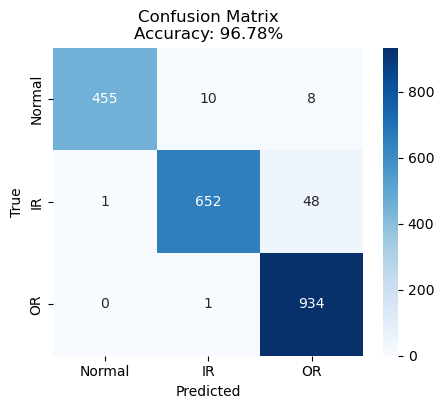

 - Model accuracy: 96.78%


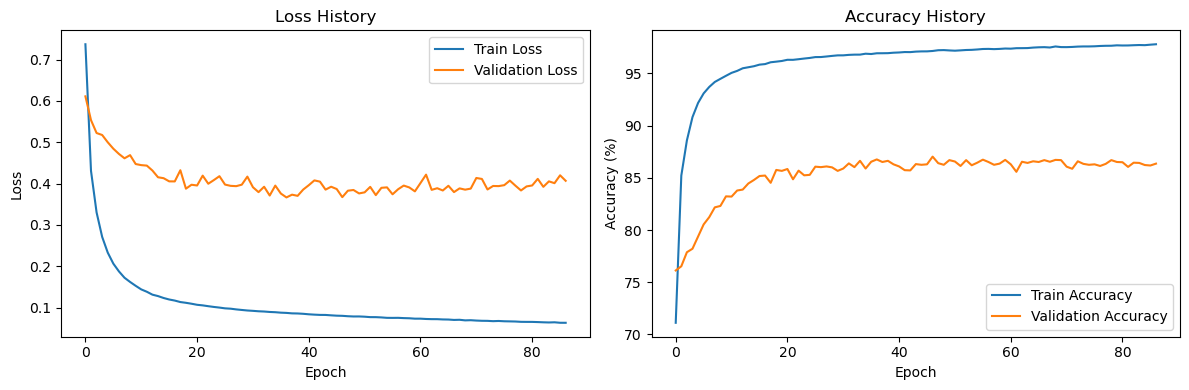

0.97
Early stopping at epoch 73


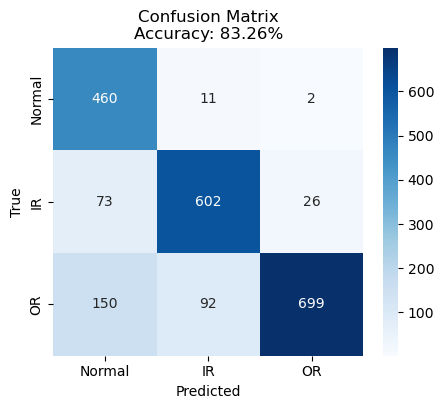

 - Model accuracy: 83.26%


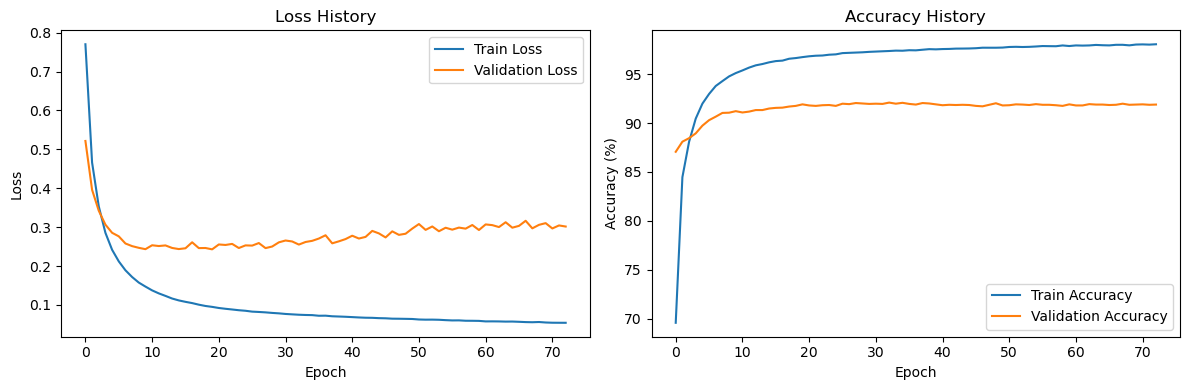

Mean accuracy: 0.9027757607966959
Std accuracy: 0.04105050401578402


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))